In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [2]:
x=pd.read_csv("sms-spam.csv")
x

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
# data cleaning
x.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [4]:
x

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
x.rename(columns={'v1':'result','v2':'input'},inplace=True)
x

,result,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
encoder=LabelEncoder()
x['result']=encoder.fit_transform(x['result'])
x.head()

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
x.isnull().sum()

result    0
input     0
dtype: int64

In [8]:
print(x.duplicated().sum())

403


In [9]:
x=x.drop_duplicates(keep='first')

In [10]:
x

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
# EDA : 

x['result'].value_counts()

result
0    4516
1     653
Name: count, dtype: int64

In [12]:
653*100.0/5169

12.633004449603405

In [13]:
# 12.63%is SPAM and 87.37% is not Spam

([<matplotlib.patches.Wedge at 0x22c26690050>,
 [Text(-1.014499732282844, 0.4251944181172162, 'NOT SPAM'),
  Text(1.0144998708287172, -0.42519408755122207, 'SPAM')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

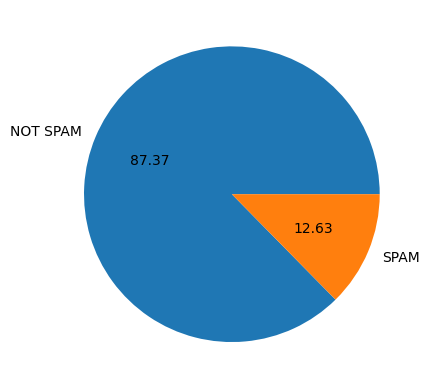

In [14]:
plt.pie(x['result'].value_counts(), labels=['NOT SPAM', 'SPAM'], autopct='%0.2f',radius=1)

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
x['countCharacters']=x['input'].apply(len)
x['countWords']=x['input'].apply(lambda i:len(nltk.word_tokenize(i)))
x['countSentences']=x['input'].apply(lambda i:len(nltk.sent_tokenize(i)))

In [18]:
x.head()

,result,input,countCharacters,countWords,countSentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
x.columns

Index(['result', 'input', 'countCharacters', 'countWords', 'countSentences'], dtype='object')

In [20]:
stats= x[['countCharacters','countWords','countSentences']].describe()
print(stats)

       countCharacters   countWords  countSentences
count      5169.000000  5169.000000     5169.000000
mean         78.977945    18.455794        1.965564
std          58.236293    13.324758        1.448541
min           2.000000     1.000000        1.000000
25%          36.000000     9.000000        1.000000
50%          60.000000    15.000000        1.000000
75%         117.000000    26.000000        2.000000
max         910.000000   220.000000       38.000000


In [21]:
# for not Spam : 
x[x['result']==0][['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
# for Spam : 
x[x['result']==1][['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='countCharacters', ylabel='Count'>

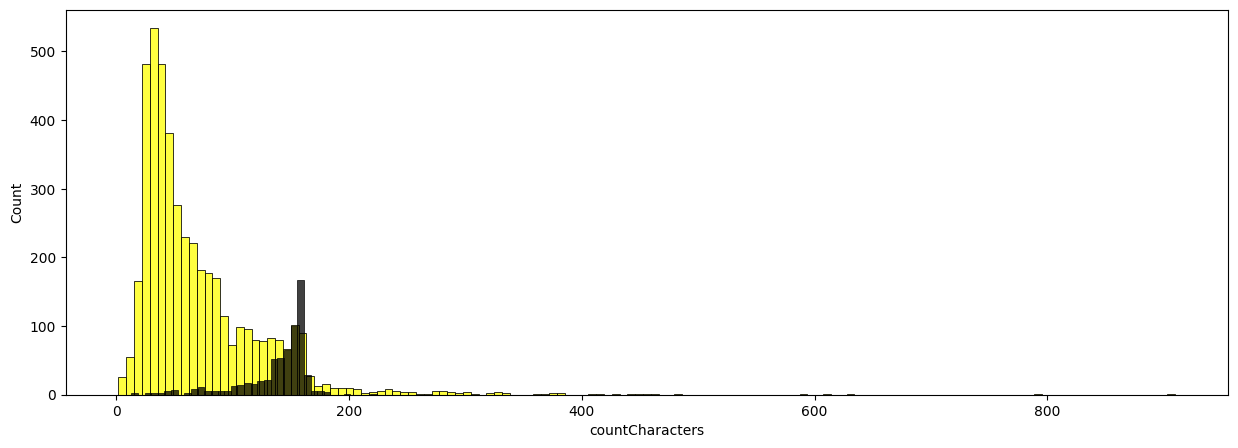

In [23]:
plt.figure(figsize=(15,5))
sns.histplot(x[x['result']==0]['countCharacters'],color='yellow')
sns.histplot(x[x['result']==1]['countCharacters'],color='black')
# black=SPAM,  yellow=NOT SPAM

<Axes: xlabel='countWords', ylabel='Count'>

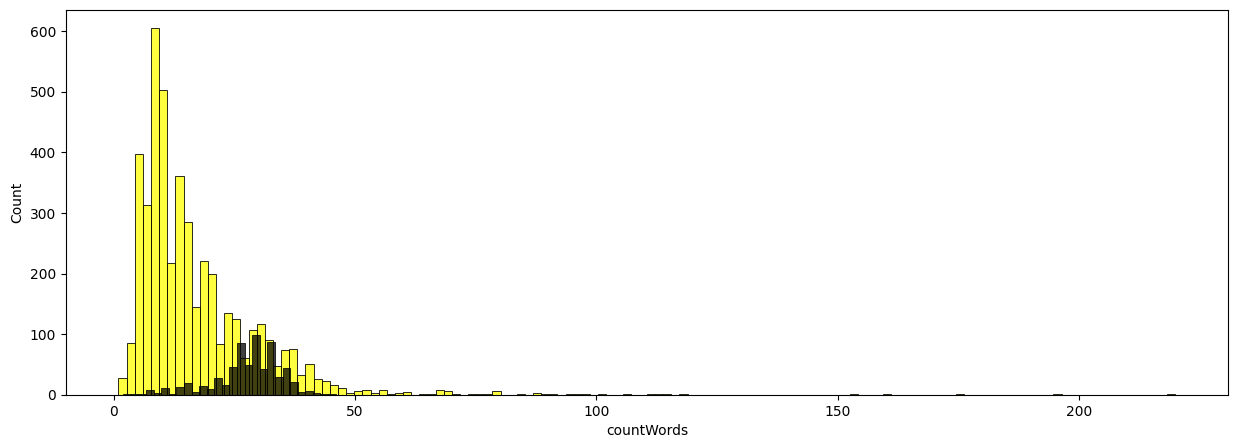

In [24]:
plt.figure(figsize=(15,5))
sns.histplot(x[x['result']==0]['countWords'],color='yellow')
sns.histplot(x[x['result']==1]['countWords'],color='black')
# black=SPAM,  yellow=NOT SPAM

<Axes: xlabel='countSentences', ylabel='Count'>

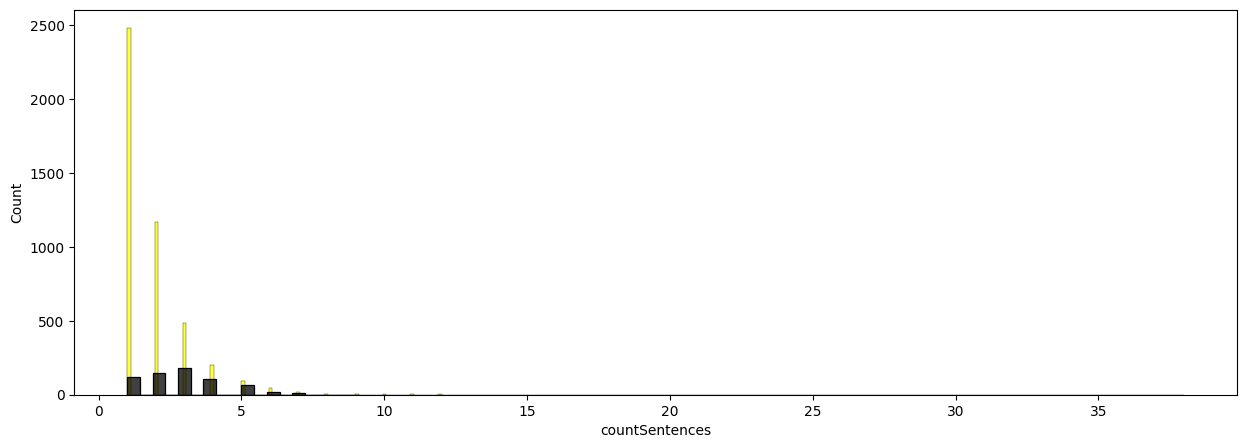

In [25]:
plt.figure(figsize=(15,5))
sns.histplot(x[x['result']==0]['countSentences'],color='yellow')
sns.histplot(x[x['result']==1]['countSentences'],color='black')
# black=SPAM,  yellow=NOT SPAM

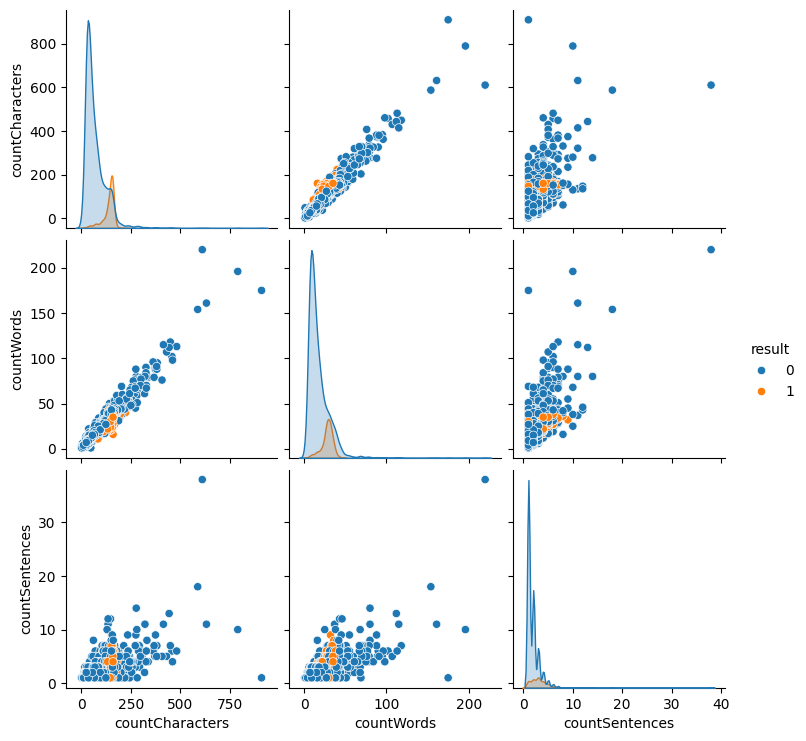

In [26]:
sns.pairplot(x, hue='result')

In [27]:
# data preprocesing

In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    # removing special characters
    removedSC=list()
    for i in text:
        if i.isalnum():
            removedSC.append(i)

    # updatiung the text after removing speciial characters
    text=removedSC[:]    

    # removing stopwords and punctuation    #
    removedSW=list()
    for i in text: 
        # stopwords.words('english') is a function of nltk returns list of english stopwords
        # string.punctuation is a part of string module containing the ASCII punctuation characters
        if i not in stopwords.words('english') and i not in string.punctuation:
            removedSW.append(i)

    # updating text 
    text=removedSW[:] 

    # stemming the data using 'PorterStemmer' algorithm
    # nltk module provides this class to use

    '''The stemmed form of a word is its root or base form, which is obtained by removing suffixes, prefixes, and other modifications. This process, known as stemming, helps in reducing words to their fundamental form, making it easier to analyze and process text data. For example:

    The stemmed form of "running" is "run."

    The stemmed form of "jumps" is "jump."

    The stemmed form of "easily" is "easili."

    The stemmed form of "fairly" is "fairli."

    As you can see, stemming can sometimes produce words that are not actual dictionary words, 
    but they still represent the core meaning. Stemming is particularly useful in natural language processing tasks such as 
    search engines, text classification, and sentiment analysis, where it's important to group different forms of the same word together.'''
    ps=PorterStemmer()
    stemmed=list()
    for i in text:
        stemmed.append(ps.stem(i))
    text=stemmed[:]
    return " ".join(text)

In [30]:
# creating new column for storing the transformed text
x['processed']=x['input'].apply(transform_text)

In [31]:
x.head()

,result,input,countCharacters,countWords,countSentences,processed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [32]:
# cretaing a word cloud for data visuallization to display the most frequently occuring words

wc=WordCloud(width=500, height=500, min_font_size=10, background_color='white')

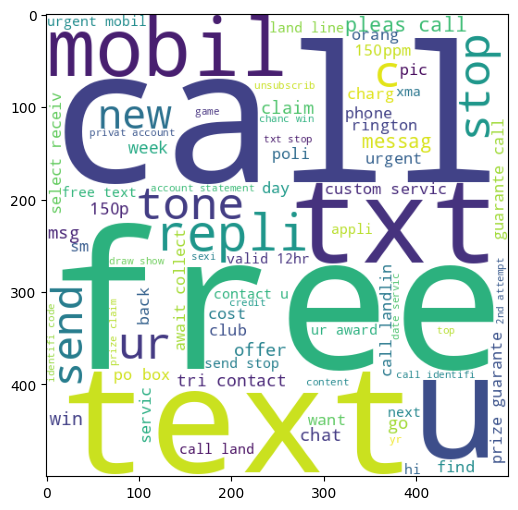

In [33]:
# wordcloud for spam words
spamWC=wc.generate(x[x['result']==1]['processed'].str.cat(sep=" "))

# creating figure and displaying
plt.figure(figsize=(12,6))
plt.imshow(spamWC)

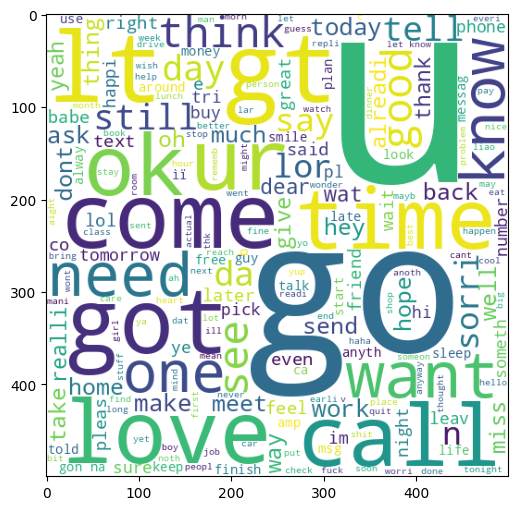

In [34]:
# wordcloud for not spam words : 
nspamWC=wc.generate(x[x['result']==0]['processed'].str.cat(sep=" "))

# creating figure and displaying
plt.figure(figsize=(12,6))
plt.imshow(nspamWC)

In [35]:
# extracting al the words used in spam messages : 
spamWords=list()
for msg in x[x['result']==1]['processed'].tolist():
    for word in msg.split():
        spamWords.append(word)

In [36]:
spamWords

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [37]:
# extracting all the words used in not spam messages : 
nspamWords=list()
for msg in x[x['result']==0]['processed'].tolist():
    for word in msg.split():
        nspamWords.append(word)

nspamWords        

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [38]:
# to count the frequency of the words :
spamWordsDictionary=Counter(spamWords)
spamWordsDictionary.most_common(40)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35)]

In [39]:
nspamWordsDictionary=Counter(nspamWords)
nspamWordsDictionary.most_common(40)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129),
 ('say', 127),
 ('back', 127),
 ('today', 123),
 ('hope', 122),
 ('ask', 121),
 ('sorri', 121),
 ('n', 120),
 ('send', 120),
 ('r', 120),
 ('work', 118)]

In [40]:
# converting the dixt to dataframee
mostCommonSPAM=pd.DataFrame(spamWordsDictionary.most_common(40))


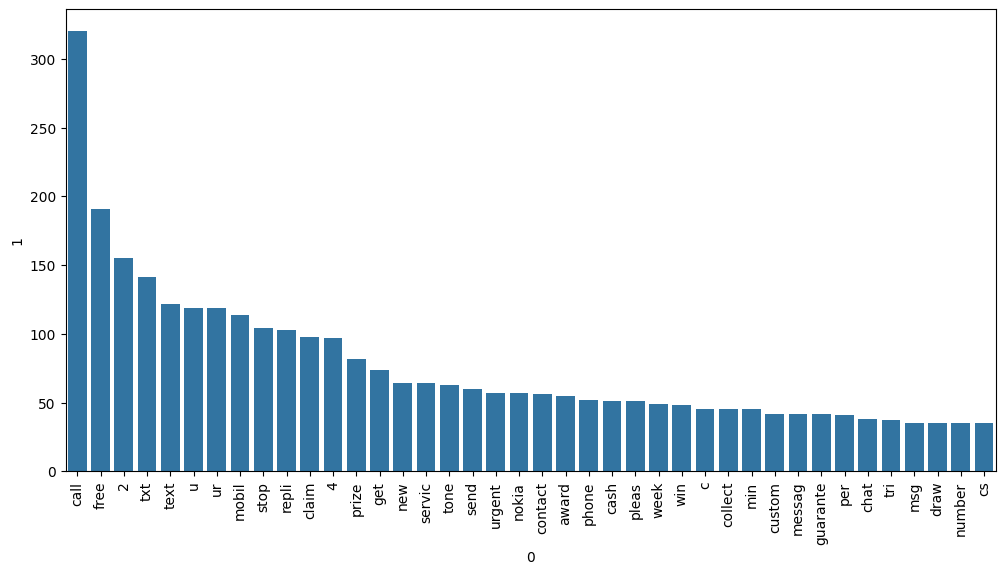

In [41]:
# plotting graph :
plt.figure(figsize=(12,6))
sns.barplot(data=mostCommonSPAM,x=0,y=1)
plt.xticks(rotation='vertical')
plt.show()

In [42]:
# model building : 

In [43]:
cv=CountVectorizer()


In [44]:
# here capital X and x are different

In [45]:
X=cv.fit_transform(x['processed']).toarray()

In [46]:
X.shape


(5169, 6708)

In [47]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [48]:
# storing the values of the result column
y=x['result'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [49]:
# splitting the training and the testing dataset
x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=49)

In [50]:
# crewting the objects of models
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [51]:
gnb.fit(x_train, y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8617021276595744
[[774 125]
 [ 18 117]]
0.4834710743801653


In [52]:
gnb.score(x_test, y_test)

0.8617021276595744

In [53]:
mnb.fit(x_train, y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9700193423597679
[[882  17]
 [ 14 121]]
0.8768115942028986


In [54]:
bnb.fit(x_train, y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9642166344294004
[[893   6]
 [ 31 104]]
0.9454545454545454


In [55]:
print(gnb.score(x_test, y_test))
print(mnb.score(x_test, y_test))
print(bnb.score(x_test, y_test))


0.8617021276595744
0.9700193423597679
0.9642166344294004


In [56]:
# mnb gives the highest accuracy so we use it 


In [57]:
import pickle
pickle.dump(mnb, open('spam1.pkl','wb'))
pickle.dump(cv, open('vectorizer.pkl','wb'))